In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,make_scorer,f1_score,recall_score,precision_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load and read into the dataset
df= pd.read_csv('telecom_customer_churn.csv')

## Data Understanding

In [3]:
class DatasetDisplay:
    def __init__(self, df):
        self.df = df
    
    def display_info(self):
        # Display the first five rows in the DataFrame 
        print(f'First Five Rows of DataFrame:\n{self.df.head()}')
        print('------------------------------------------')
        # Display the overall information of the DataFrame
        print(f'DataFrame Information:\n{self.df.info()}')
        print('------------------------------------------')
        # Display the descriptive statistics of the DataFrame
        print(f'Descriptive Statistics of DataFrame:\n{self.df.describe()}')
        print('------------------------------------------')
        # Display the shape of the DataFrame
        print(f'Shape of DataFrame: {self.df.shape}')



In [4]:
# Instantiate the class defined with the DataFrame 
display = DatasetDisplay(df)
# Call the defined function to print out info
display.display_info()

First Five Rows of DataFrame:
  Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total 

## Check Datatypes

In [5]:
def show_datatypes(data):
    """"
    A function to display the datatypes of the input DataFrame

    Parameters:
       data(DataFrame): input dataframe
    """
    # Create a DataFrame to store the datatypes
    dtype_df = pd.DataFrame(data.dtypes, columns=['DataType'])
    # Reset the index of the dataframe
    dtype_df.reset_index(inplace=True)
    # Rename the columns of the dataframe
    dtype_df.columns = ['Column', 'DataType']
    # Return the dataframe with the datatypes
    return dtype_df

In [6]:
# Call the function to display the dataframe of the datatypes
show_datatypes(df)

,Column,DataType
0,Customer ID,object
1,Gender,object
2,Age,int64
3,Married,object
4,Number of Dependents,int64
5,City,object
6,Zip Code,int64
7,Latitude,float64
8,Longitude,float64
9,Number of Referrals,int64


In [7]:
def display_data_types_summary(data):
   """"
   A simple function to display the total number of variables in each dataype present in the dataframe

   Parameters:
       data(DataFrame): input DataFrame
   """
   # Get the value counts of the datatypes and reset the index
   dtype_summary = data.dtypes.value_counts().reset_index()
   # Rename the columns of the dataframe
   dtype_summary.columns = ['Data Type', 'Total Variables']
   # Return the summary of datatypes and their value counts 
   return dtype_summary


In [8]:
# Call above function to display the dataframe of datatypes summary
display_data_types_summary(df)

,Data Type,Total Variables
0,object,23
1,float64,9
2,int64,6


## Missing Values

In [9]:
def missing(data):
    """
    A function to identify the missing values in the input dataframe and get their percentages and convert it into a dataframe

    Parameters:
      data(DataFrame): input dataframe
    """
    # Identify the missing values in the dataframe
    missing= data.isnull().sum()
    # Get the percentage of the missing values
    percentage= missing/len(data)
    # Convert values above into a dataframe and return the dataframe
    return pd.DataFrame({'Number Of Missing Values': missing, 'Percentage of Missing Values': percentage})

In [10]:
# Display the missing values by calling the defined function
missing(df)

,Number Of Missing Values,Percentage of Missing Values
Customer ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Married,0,0.000000
Number of Dependents,0,0.000000
City,0,0.000000
Zip Code,0,0.000000
Latitude,0,0.000000
Longitude,0,0.000000
Number of Referrals,0,0.000000


### Drop Columns

In [11]:
class DropColumn:
    def __init__(self, data):
        """
        Initialize an instance of the DropColumn class

        Parameters:
            data(DataFrame): input DataFrame
        """
        self.data = data

    def drop_columns(self, columns):
        """
        Drop the specified columns from the DataFrame

        Parameters:
            columns(list): The names of the columns to be dropped.
        """
        self.data.drop(columns=columns, inplace=True)

In [12]:
data = df
# Instantiate the dropping class
dropper = DropColumn(data)
# List of column names to drop
columns_to_drop = ['Churn Category', 'Churn Reason', 'Customer ID']  
# Call the drop function to drop specified columns
dropper.drop_columns(columns_to_drop)

In [13]:
# Display DataFrame info to check if columns have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Latitude                           7043 non-null   float64
 7   Longitude                          7043 non-null   float64
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              7043 non-null   object 
 11  Phone Service                      7043 non-null   objec

## Fill missing Values

In [14]:
def fill_missing_values(data):
    """
    A function to fill the missing values in the dataframe

    Parameters:
       data(DataFrame): input dataframe
    """
    # Fill the missing values using forward fill
    data.fillna(method='ffill', axis=0, inplace=True)
    # Calculate the total number of missing values in the dataframe 
    filled_values_count = data.isnull().sum().sum()
    
    if filled_values_count == 0:
        print("All missing values have been successfully filled.")
    else:
        print(f"There are still {filled_values_count} missing values remaining.")

In [15]:
# Call function to confirm whether missing values have been filled
fill_missing_values(df)

All missing values have been successfully filled.


## Duplicates

In [16]:
def duplicates(data):
    """
    A function to check whether there are duplicates in the DataFrame
    Parameters:
       data(DataFrame): input dataframe
    """
    # Check for duplicates in the dataframe
    duplicates= data.duplicated().any()
    if duplicates:
        print('Duplicates Present')
    else:
        print('There are no duplicates in the DataFrame')

In [17]:
# Check whether there are duplicates by calling the defined function
duplicates(df)

There are no duplicates in the DataFrame


## Unique Values

In [18]:
def unique_values(data):
    """
    A function to check for unique values in the dataframe
    
    Parameters:
       data(DataFrame): input dataframe
    """
    # Select the categorical variables in the dataframe
    categorical_columns = data.select_dtypes(include='object').columns
    # Iterate through the columns to check for unique values 
    for column in categorical_columns:
        unique_values = data[column].unique()
        # Print out unique values in each column
        print(f"There are Unique Values in '{column}': {unique_values}")

In [19]:
# Display unique values in each categorical column
unique_values(df)

There are Unique Values in 'Gender': ['Female' 'Male']
There are Unique Values in 'Married': ['Yes' 'No']
There are Unique Values in 'City': ['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Jacumba' 'Carpinteria'
 'Meadow Valley']
There are Unique Values in 'Offer': ['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
There are Unique Values in 'Phone Service': ['Yes' 'No']
There are Unique Values in 'Multiple Lines': ['No' 'Yes']
There are Unique Values in 'Internet Service': ['Yes' 'No']
There are Unique Values in 'Internet Type': ['Cable' 'Fiber Optic' 'DSL']
There are Unique Values in 'Online Security': ['No' 'Yes']
There are Unique Values in 'Online Backup': ['Yes' 'No']
There are Unique Values in 'Device Protection Plan': ['No' 'Yes']
There are Unique Values in 'Premium Tech Support': ['Yes' 'No']
There are Unique Values in 'Streaming TV': ['Yes' 'No']
There are Unique Values in 'Streaming Movies': ['No' 'Yes']
There are Unique Values in 'Streaming Music': ['No' 'Yes']
There ar

## Outliers

In [20]:
def outliers(data):
    """
    A function to calculate and check for unique values in the numeric columns in dataframe

    Parameters:
       data(DataFrame): input dataframe
    """ 
    # Select the numeric columns from the dataframe
    numerical_columns= data.select_dtypes(include=['int64', 'float64']).columns

    # Create an empty dictionary to store the outliers
    outliers= {}

    # Iterate through the numeric columns using a for loop
    for column in numerical_columns:
        # Calculate IQR threshold for outliers
        q1= data[column].quantile(0.25)
        q3= data[column].quantile(0.75)
        iqr= q3-q1
        threshold= 1.5*iqr

        # Identify outliers
        column_outliers = data[(data[column] < q1 - threshold) | (data[column] > q3 + threshold)]
        outliers[column] = column_outliers

    # Concatenate outliers into a single dataframe
    outliers_df = pd.concat(outliers.values(), keys=outliers.keys())
    return outliers

In [21]:
# Display the outliers 
outliers(df)

{'Age': Empty DataFrame
 Columns: [Gender, Age, Married, Number of Dependents, City, Zip Code, Latitude, Longitude, Number of Referrals, Tenure in Months, Offer, Phone Service, Avg Monthly Long Distance Charges, Multiple Lines, Internet Service, Internet Type, Avg Monthly GB Download, Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, Unlimited Data, Contract, Paperless Billing, Payment Method, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue, Customer Status]
 Index: []
 
 [0 rows x 35 columns],
 'Number of Dependents':       Gender  Age Married  Number of Dependents                 City  \
 5     Female   23      No                     3             Midpines   
 9     Female   43     Yes                     1             Sheridan   
 11    Female   25     Yes                     2            Sunnyvale   
 15    Female   58     Yes              

In [22]:
# Check for missing values to make sure no missing values have been added thus far
df.isna().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                 

In [23]:
# irrelevant columns to drop
irrelevant_columns= ['Zip Code','Latitude','Longitude', 'City']

# drop columns
df.drop(columns=irrelevant_columns, axis=1, inplace=True)
df.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,2,9,None,Yes,42.39,No,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,0,9,None,Yes,10.69,Yes,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,3,3,None,Yes,7.38,No,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


## Exploratory Data Analysis

In [24]:
# Check for value counts of the target variable
df['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

In [25]:
# Drop the joined category in the target variable
df.drop(df[df['Customer Status'] == 'Joined'].index, inplace=True)

In [26]:
# Display value counts to confirm it has been dropped
df['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Name: Customer Status, dtype: int64

### Univariate Analysis

In [27]:
def create_numeric_column(df, column_name, new_column_name, mapping_dict):
    """
    Create a new column with numeric representation based on the content of another column.
    
    Args:
        df (DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to transform.
        new_column_name (str): The name of the new column to be created.
        mapping_dict (dict): A dictionary mapping content values to their numeric representations.
        
    Returns:
        DataFrame: The updated DataFrame with the new column added.
    """
    
    # Create the new column by mapping the values from 'column_name' using the dictionary
    df[new_column_name] = df[column_name].map(mapping_dict)
    
    return df


In [28]:
# Define the mapping dictionary
mapping_dict = {'Stayed': 0, 'Churned': 1}
# Create the numeric column 'Category' based on 'Customer Status' using the mapping dictionary
df= create_numeric_column(df, 'Customer Status', 'Category', mapping_dict)
# Display the first few rows of the updated DataFrame
df.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Category
0,Female,37,Yes,0,2,9,None,Yes,42.39,No,...,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,0
1,Male,46,No,0,0,9,None,Yes,10.69,Yes,...,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,0
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,...,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,1
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,...,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,1
4,Female,75,Yes,0,3,3,None,Yes,7.38,No,...,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,1


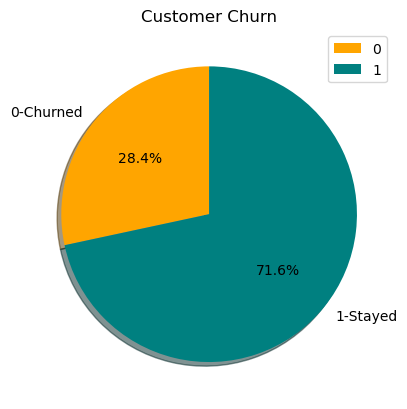

In [29]:
labels = '0-Churned','1-Stayed'

# Calculate the category counts
category_counts = df['Category'].value_counts()

sizes = [len(df[df['Category']==1])/len(df)*100,len(df[df['Category']==0])/len(df)*100]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90,colors= ['orange','teal'])
ax1.set(aspect = 'equal',title = 'Customer Churn')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Add a legend with the labels
plt.legend(labels=category_counts.index, loc='best')
plt.show()

## Bivariate Analysis

### Numeric Column Distributions

In [30]:
def numeric_distributions(df, numeric_variable, target_variable, palette='viridis'):
    """
    Plot the distributions of numeric variables based on the target variable.

    Parameters:
        df (DataFrame): The input DataFrame.
        numeric_variable (str): The name of the numeric variable column.
        target_variable (str): The name of the target variable column.
        colormap (str): The name of the colormap. Default is 'viridis'.
        
    """
    # Plot numeric distributions based on the target variable
    sns.histplot(data=df, x=numeric_variable, hue=target_variable, kde=True, palette=palette)

    # Set the title of the plot
    plt.title(f'Numeric Variable Distribution of {numeric_variable}')

    # Plot Graph
    plt.show()

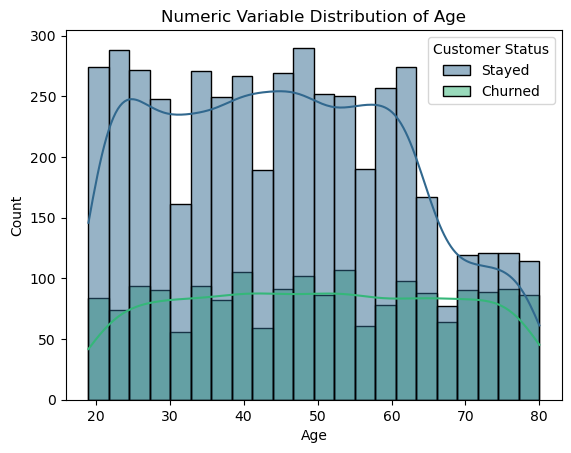

In [31]:
numeric_distributions(df, 'Age', 'Customer Status')

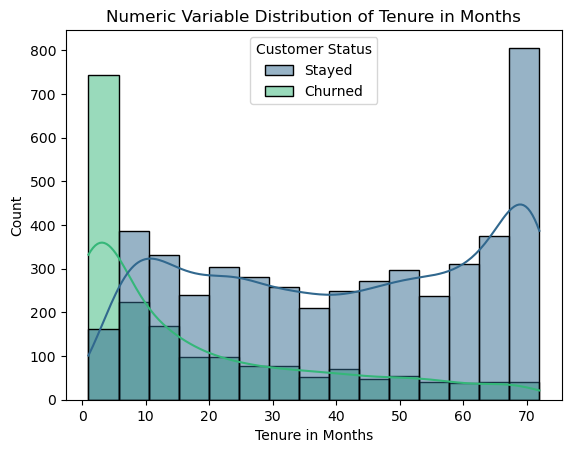

In [32]:
numeric_distributions(df, 'Tenure in Months', 'Customer Status')

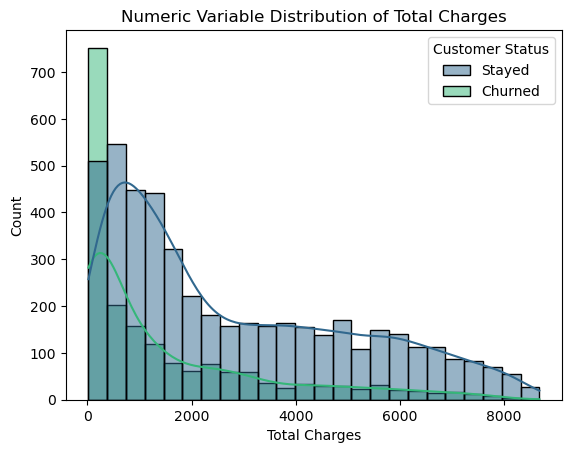

In [33]:
numeric_distributions(df, 'Total Charges', 'Customer Status')

### Categorical Column Distribution

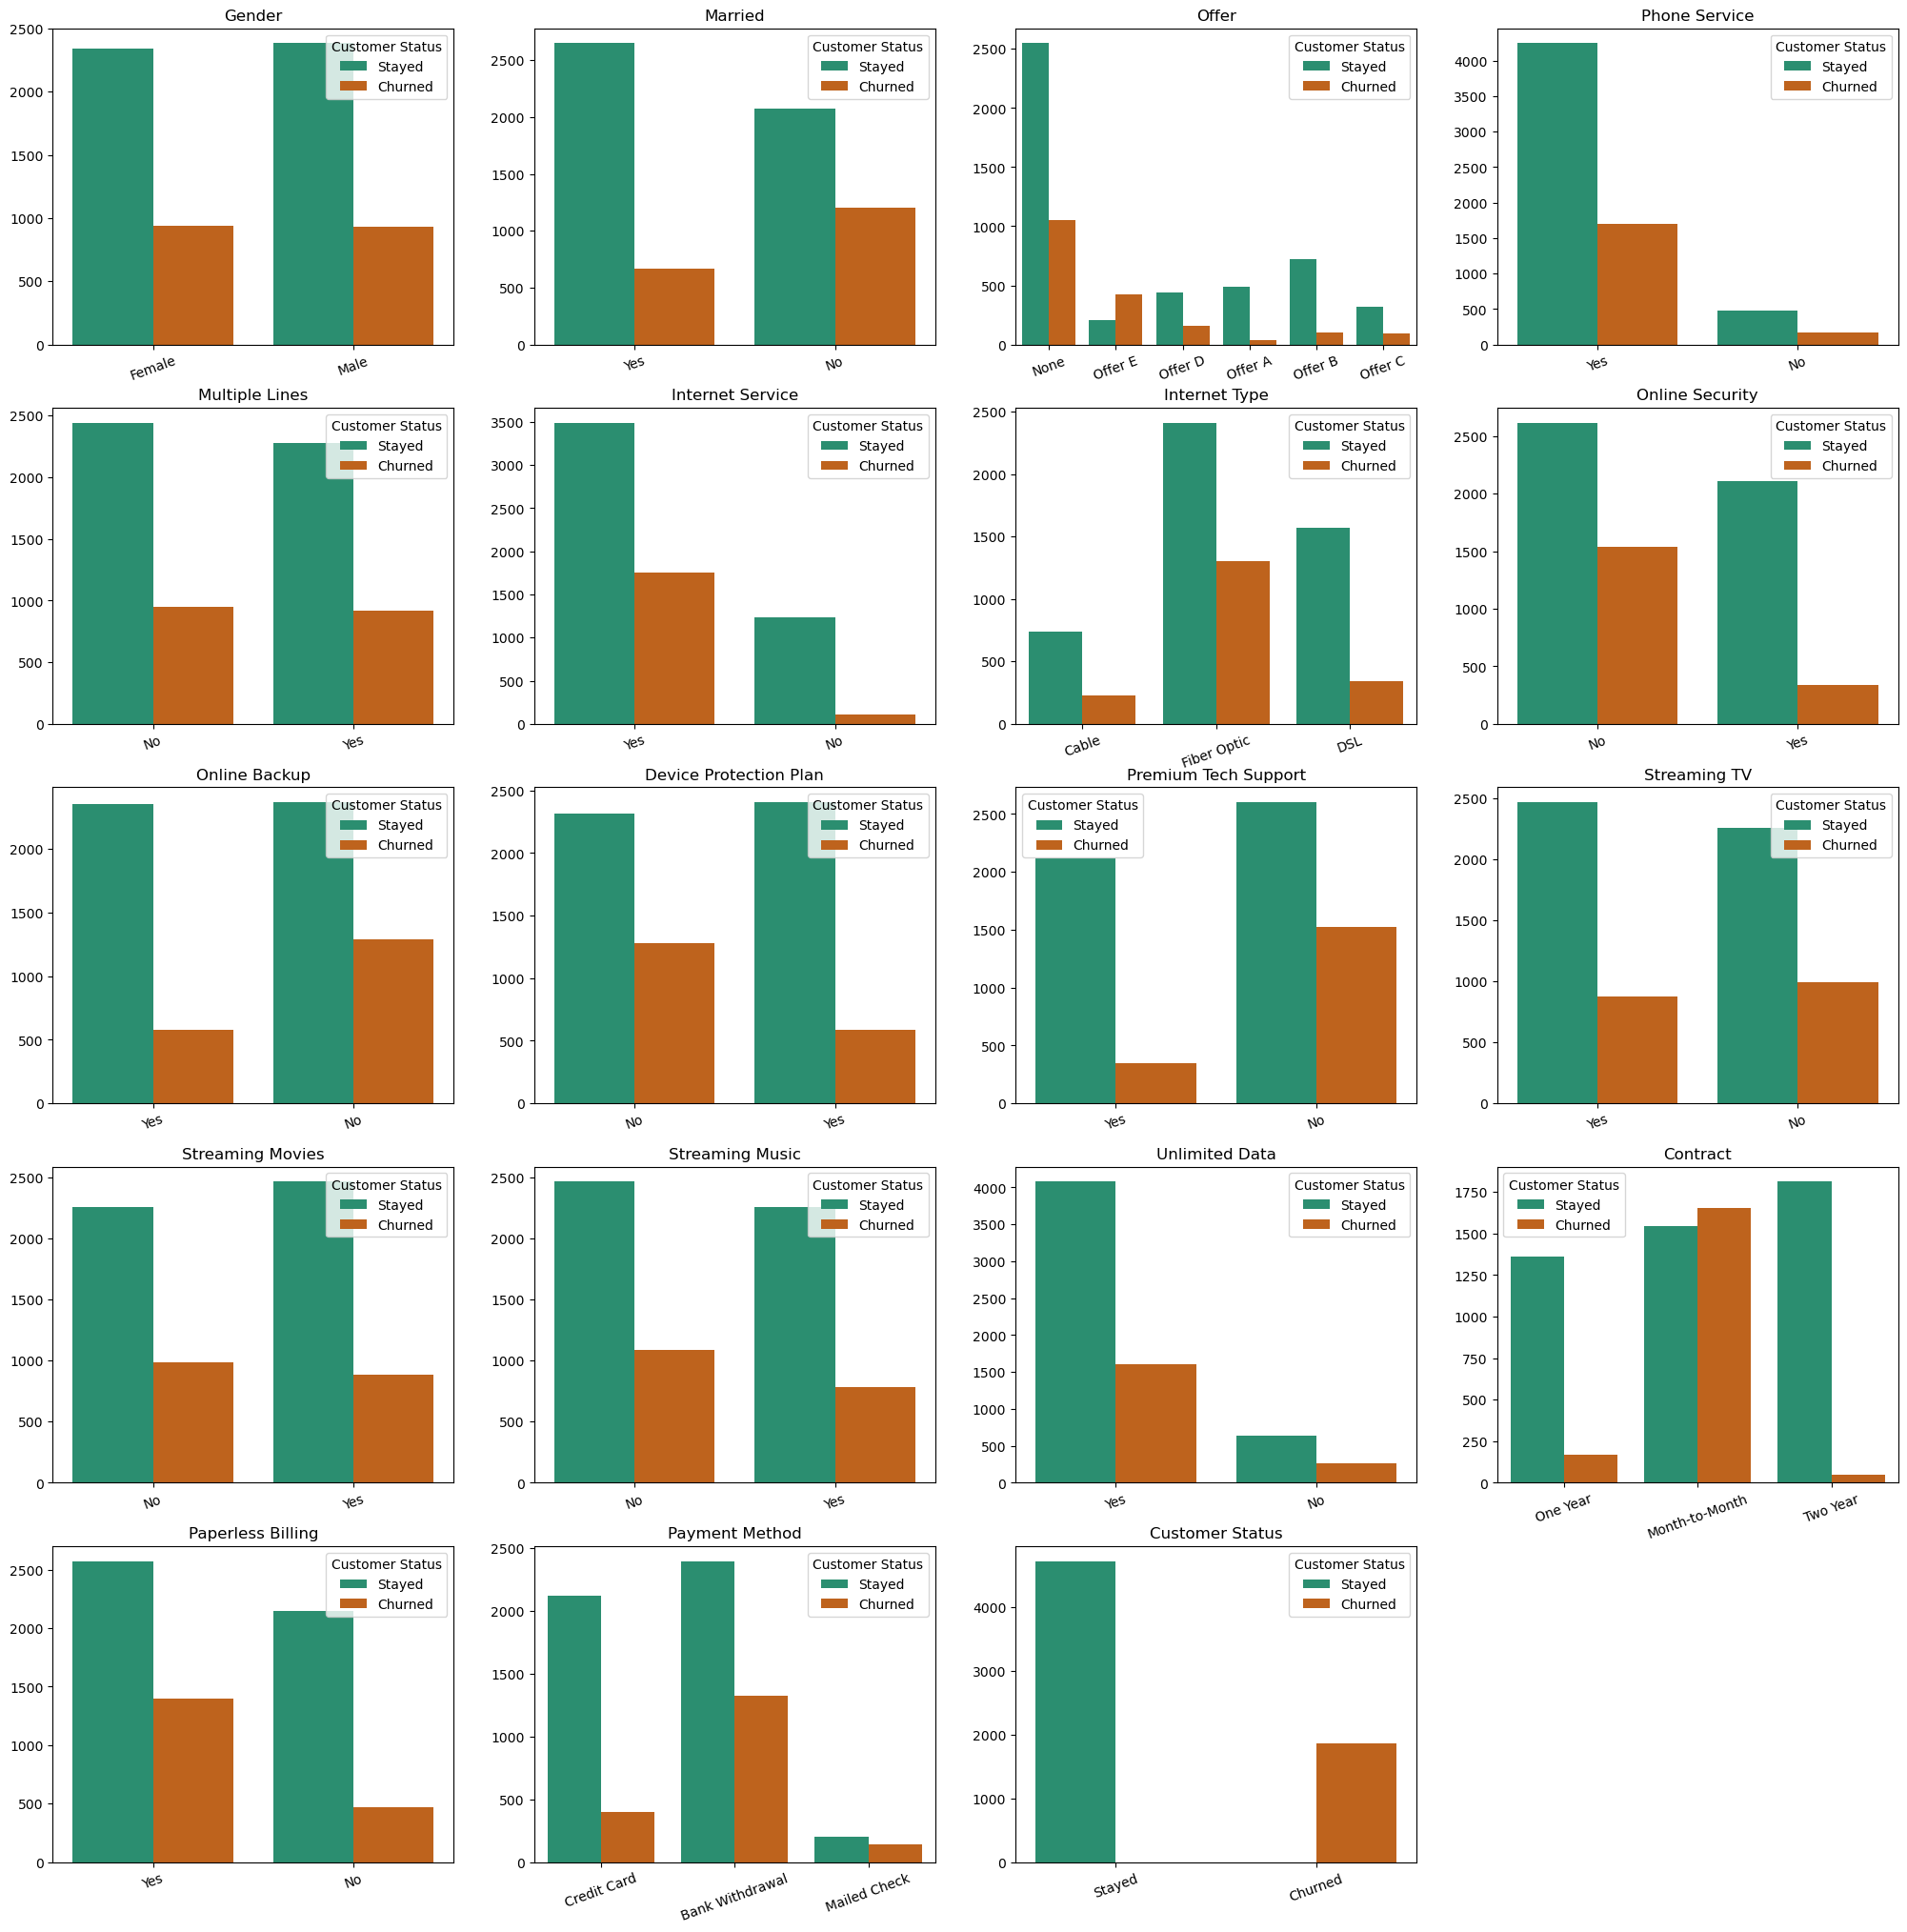

In [34]:
# Get the list of categorical columns
categorical_columns = df.select_dtypes(include='object')

# Create a figure with a specified size
fig = plt.figure(figsize = (25, 25))

# Initialize a counter for the subplot position
i = 1
# Iterate through the columns in the categorical columns variable
for c in categorical_columns:
    # Create a subplot for the column
    plt.subplot(5, 4, i)
    # Plot a countplot for column with hue based on the target variable using the specified palette
    ax = sns.countplot(data = categorical_columns, x = categorical_columns[c], hue = 'Customer Status', palette ='Dark2')
    # Remove the xlabel and ylabel
    ax.set(xlabel = None, ylabel = None)
    # Set the title of the column and align it to the center
    plt.title(str(c), loc='center')
    # Rotate the x-axis labels and set the font to 10
    plt.xticks(rotation = 20, fontsize = 10)
    # Increase the counter of the subplot position
    i += 1

### Multivariate Analysis

In [35]:
def correlation(df):
    """
    A function to plot the correlation of variables in the DataFrame using Heatmap

    Parameters:
       df(DataFrame): The input DataFrame.
    """

    # Calculate the correlation of features in the DataFrame
    correlation_matrix= df.corr()

    # Plot a heatmap of the correlation matrix above
    fig, ax = plt.subplots(figsize =(25, 14))
    sns.heatmap(correlation_matrix, annot=True, linewidths = 0.5, cmap='PRGn')

    # Set the font properties of the heatmap
    font_properties = {'family': 'serif', 'size': 16, 'weight': 'bold'}
    plt.xticks(fontproperties=font_properties)
    plt.yticks(fontproperties=font_properties)

    # Set the title of the graph
    plt.title('Correlation Matrix of Variables', fontdict=font_properties)

    # Show the plotted graph
    plt.show()

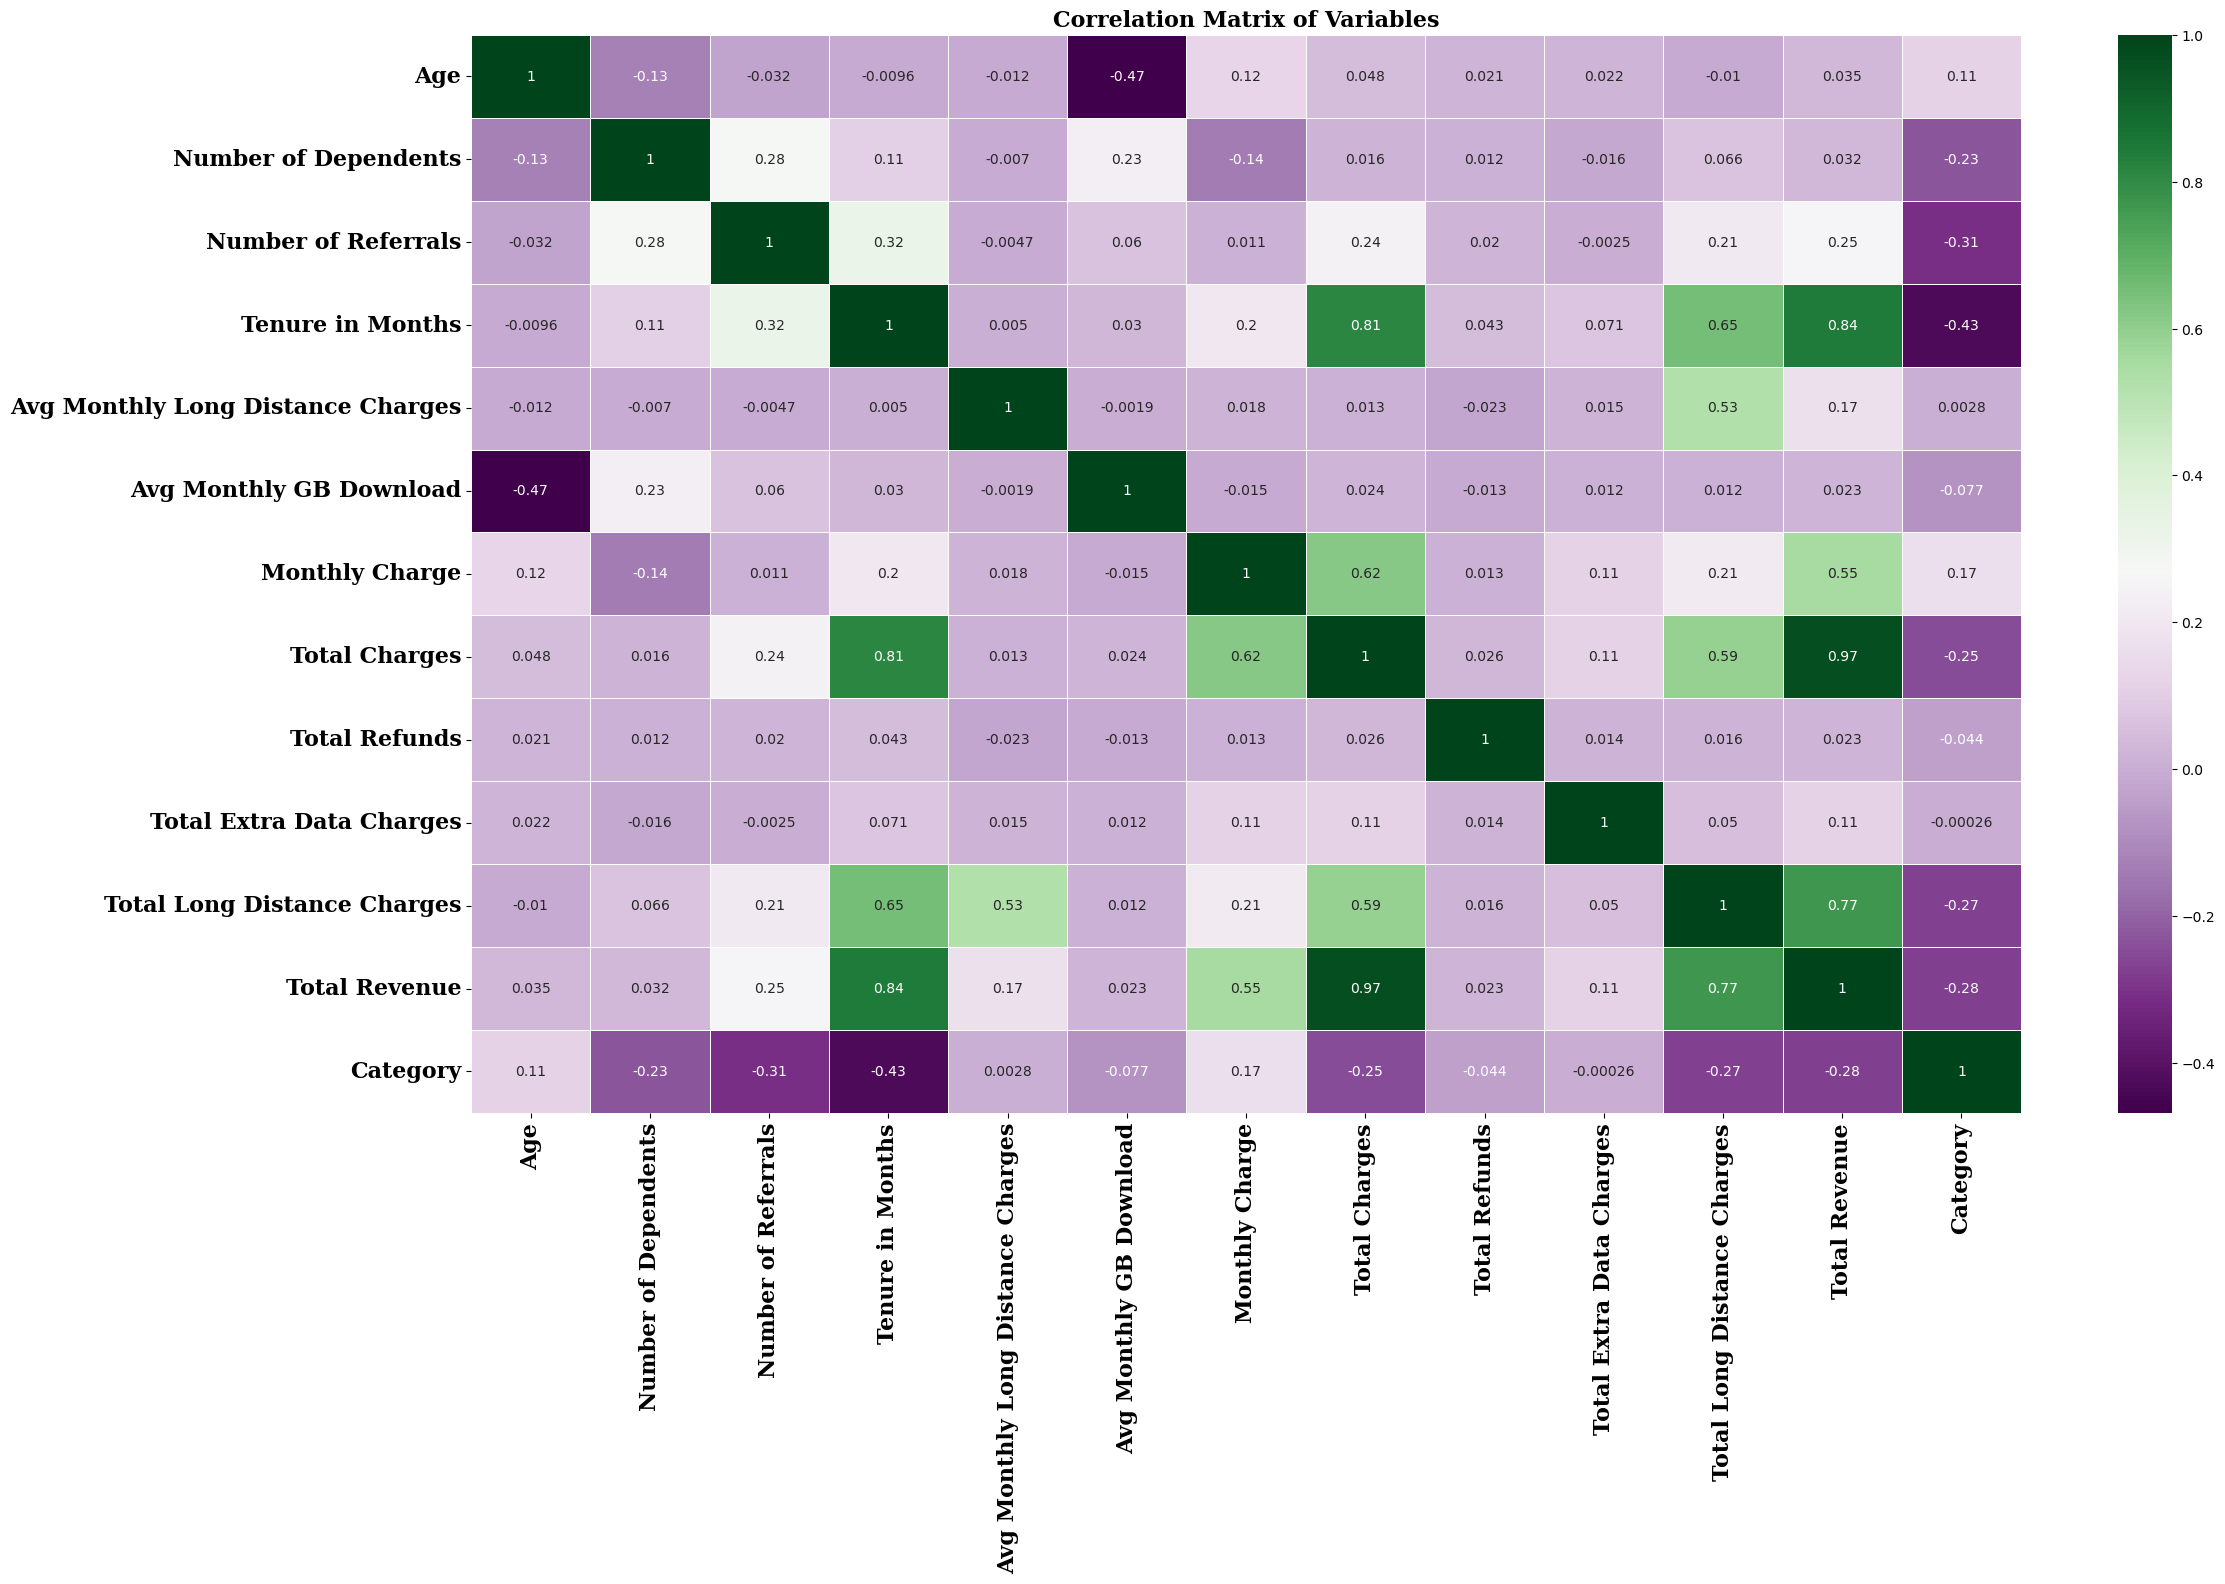

In [36]:
#Display the correlation matrix of the variables in the dataframe
correlation(df)

## Feature Engineering

In [45]:
df.select_dtypes(exclude='number').head()


,Gender,Married,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status
0,Female,Yes,None,Yes,No,Yes,Cable,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,Stayed
1,Male,No,None,Yes,Yes,Yes,Cable,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,Stayed
2,Male,No,Offer E,Yes,No,Yes,Fiber Optic,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned
3,Male,Yes,Offer D,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned
4,Female,Yes,None,Yes,No,Yes,Fiber Optic,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,Churned
